# Import the necessary libraries


In [1]:
# Import the necessary libraries


# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

# Helper libraries
import matplotlib.pyplot as plt
import numpy as np
from os import listdir
from os.path import join
import cv2
import pandas
import os
import random

Instructions for updating:
non-resource variables are not supported in the long term


# Set the path of the input folder 


In [2]:
# Set the path of the input folder 

data = "flowers/"

# List out the directories inside the main input folder

folders = os.listdir(data)

print(folders)

['daisy', 'flowers', 'rose', 'tulip', 'dandelion', 'sunflower']


# Import the images and resize them to a 128*128 size
# Also generate the corresponding labels



In [3]:
image_names = []
train_labels = []
train_images = []

size = 128,128

for folder in folders:
    for file in os.listdir(os.path.join(data,folder)):
        #print(folder, file)
        if file.endswith("jpg"):
            image_names.append(os.path.join(data,folder,file))
            train_labels.append(folder)
            img = cv2.imread(os.path.join(data,folder,file))
            im = cv2.resize(img,size)
            train_images.append(im)
        else:
            continue
        

In [4]:
'''
print(image_names)
print("-------------")
print(train_labels)
print("-------------")
print(train_images)
'''

'\nprint(image_names)\nprint("-------------")\nprint(train_labels)\nprint("-------------")\nprint(train_images)\n'

In [5]:
# Transform the image array to a numpy type

train = np.array(train_images)

train.shape

(4323, 128, 128, 3)

# STANDARDIZATION : Reduce the RGB values between 0 and 1



In [6]:
train = train.astype('float32') / 255.0
#train = train / 255.0
type(train)

numpy.ndarray

In [7]:
# Extract the labels

label_dummies = pandas.get_dummies(train_labels)
label_dummies


,daisy,dandelion,rose,sunflower,tulip
0,1,0,0,0,0
1,1,0,0,0,0
2,1,0,0,0,0
3,1,0,0,0,0
4,1,0,0,0,0
...,...,...,...,...,...
4318,0,0,0,1,0
4319,0,0,0,1,0
4320,0,0,0,1,0
4321,0,0,0,1,0


In [8]:
labels =  label_dummies.values.argmax(1)
labels

array([0, 0, 0, ..., 3, 3, 3])

In [9]:
pandas.unique(train_labels)

array(['daisy', 'rose', 'tulip', 'dandelion', 'sunflower'], dtype=object)

In [10]:
pandas.unique(labels)

array([0, 2, 4, 1, 3])

# Shuffling the data

In [11]:
# Shuffle the labels and images randomly for better results

union_list = list(zip(train, labels))
#print(union_list)
random.shuffle(union_list)
train,labels = zip(*union_list)

# Convert the shuffled list to numpy array type

train = np.array(train)
labels = np.array(labels)


In [12]:
#np.random.shuffle(train)
#np.random.shuffle(labels)

In [13]:
train.shape


(4323, 128, 128, 3)

In [14]:
labels.shape

(4323,)

# Train and Test Data

In [15]:
test_data = train[:400]
test_labels = labels[:400]
print(test_data.shape, test_labels.shape)

(400, 128, 128, 3) (400,)


In [16]:
train_data = train[400:]
train_labels = labels[400:]
print(train_data.shape, train_labels.shape)

(3923, 128, 128, 3) (3923,)


# Model 1

In [17]:
# Develop a sequential model using tensorflow keras
modelTanh = keras.Sequential([
    #keras.layers.Flatten(input_shape=(64,64,3)),
    keras.layers.Flatten(input_shape=(128,128,3)),
    keras.layers.Dense(200, activation=tf.nn.tanh),
    keras.layers.Dense(200, activation=tf.nn.tanh),
    keras.layers.Dense(200, activation=tf.nn.tanh),
    keras.layers.Dense(200, activation=tf.nn.tanh),
    keras.layers.Dense(200, activation=tf.nn.tanh),
    keras.layers.Dense(5, activation=tf.nn.softmax)
])

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [18]:
modelTanh.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001,name='Adam'),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [19]:
modelTanh.fit(train_data,train_labels, epochs=10)

Train on 3923 samples
Epoch 1/10
3923/3923 [==============================] - 7s 2ms/sample - loss: 1.6618 - acc: 0.2317
Epoch 2/10
3923/3923 [==============================] - 7s 2ms/sample - loss: 1.5978 - acc: 0.2539
Epoch 3/10
3923/3923 [==============================] - 7s 2ms/sample - loss: 1.6078 - acc: 0.2396
Epoch 4/10
3923/3923 [==============================] - 7s 2ms/sample - loss: 1.6179 - acc: 0.2391
Epoch 5/10
3923/3923 [==============================] - 7s 2ms/sample - loss: 1.6019 - acc: 0.2394
Epoch 6/10
3923/3923 [==============================] - 7s 2ms/sample - loss: 1.6107 - acc: 0.2394
Epoch 7/10
3923/3923 [==============================] - 7s 2ms/sample - loss: 1.6154 - acc: 0.2455
Epoch 8/10
3923/3923 [==============================] - 9s 2ms/sample - loss: 1.6191 - acc: 0.2253
Epoch 9/10
3923/3923 [==============================] - 9s 2ms/sample - loss: 1.6168 - acc: 0.2337
Epoch 10/10
3923/3923 [==============================] - 7s 2ms/sample - loss: 1.6147 -

# Model 2

In [20]:
# Develop a sequential model using tensorflow keras

modelRelu = keras.Sequential([
    #keras.layers.Flatten(input_shape=(64,64,3)),
    keras.layers.Flatten(input_shape=(128,128,3)),
    keras.layers.Dense(200, activation="relu"),
    keras.layers.Dense(200, activation="relu"),
    keras.layers.Dense(200, activation="relu"),
    keras.layers.Dense(200, activation="relu"),
    keras.layers.Dense(200, activation="relu"),
    keras.layers.Dense(5, activation="softmax"),
])

In [21]:
modelRelu.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001,name='Adam'),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [22]:
modelRelu.fit(train_data,train_labels, epochs=50)

Train on 3923 samples
Epoch 1/50
3923/3923 [==============================] - 6s 2ms/sample - loss: 1.8869 - acc: 0.3253
Epoch 2/50
3923/3923 [==============================] - 6s 2ms/sample - loss: 1.3269 - acc: 0.4058
Epoch 3/50
3923/3923 [==============================] - 10s 2ms/sample - loss: 1.2779 - acc: 0.4300
Epoch 4/50
3923/3923 [==============================] - 8s 2ms/sample - loss: 1.2470 - acc: 0.4420
Epoch 5/50
3923/3923 [==============================] - 8s 2ms/sample - loss: 1.2028 - acc: 0.4739
Epoch 6/50
3923/3923 [==============================] - 6s 2ms/sample - loss: 1.1716 - acc: 0.5019
Epoch 7/50
3923/3923 [==============================] - 6s 2ms/sample - loss: 1.1547 - acc: 0.4983
Epoch 8/50
3923/3923 [==============================] - 6s 2ms/sample - loss: 1.1377 - acc: 0.5152
Epoch 9/50
3923/3923 [==============================] - 6s 2ms/sample - loss: 1.1033 - acc: 0.5384
Epoch 10/50
3923/3923 [==============================] - 6s 2ms/sample - loss: 1.0587 

In [23]:
prediction = modelRelu.predict(test_data)

In [24]:
pred_val = prediction[8]
pred_val

array([1.15560961e-05, 2.10228109e-06, 1.25758145e-02, 1.88141792e-06,
       9.87408638e-01], dtype=float32)

In [25]:
np.argmax(pred_val)


4

In [26]:
#class_name = ['daisy', 'rose', 'tulip', 'dandelion', 'sunflower']
class_name = ['daisy', 'dandelion', 'rose', 'sunflower', 'tulip']

In [27]:
class_name[np.argmax(pred_val)]

'tulip'

In [31]:
#test_loss, test_accuracy = modelRelu.evaluate(test_data, test_labels)

#print('Test loss: {0:.2f}. Test accuracy: {1:.2f}%'.format(test_loss, test_accuracy*100.))

In [32]:
'''
for i in range(len(test_data)):
    val = np.argmax(prediction[i])
    print(test_labels[i], val)
'''


'\nfor i in range(len(test_data)):\n    val = np.argmax(prediction[i])\n    print(test_labels[i], val)\n'

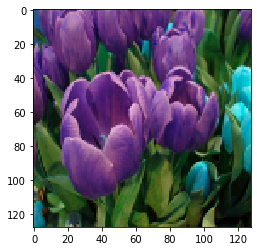

Actual:tulip
Prediction:tulip


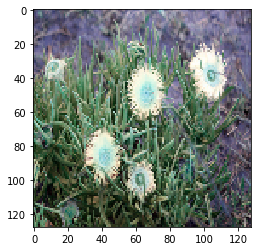

Actual:daisy
Prediction:daisy


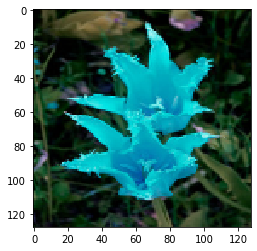

Actual:tulip
Prediction:dandelion


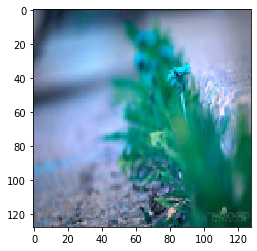

Actual:dandelion
Prediction:daisy


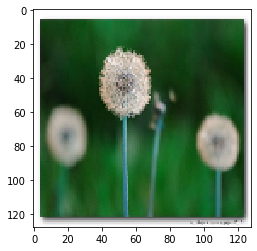

Actual:dandelion
Prediction:sunflower


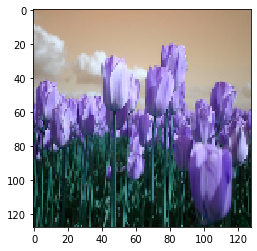

Actual:tulip
Prediction:tulip


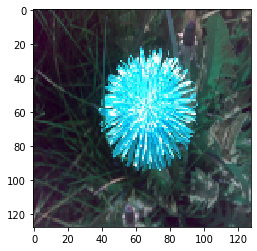

Actual:dandelion
Prediction:dandelion


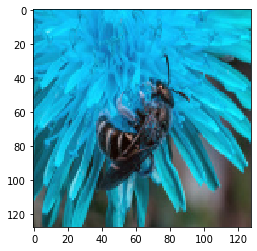

Actual:dandelion
Prediction:sunflower


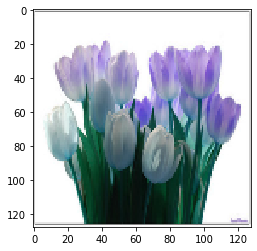

Actual:tulip
Prediction:tulip


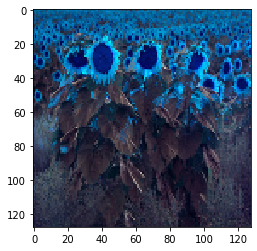

Actual:sunflower
Prediction:tulip


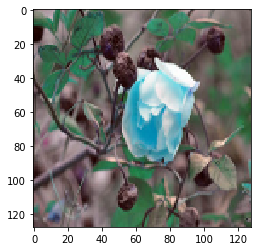

Actual:rose
Prediction:daisy


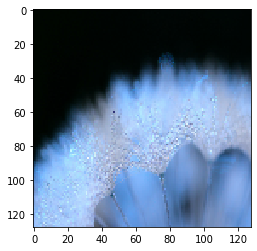

Actual:dandelion
Prediction:rose


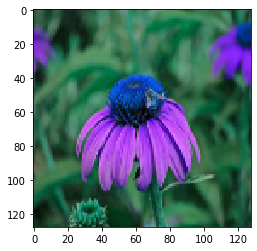

Actual:daisy
Prediction:rose


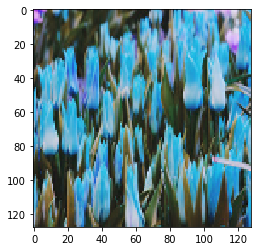

Actual:tulip
Prediction:sunflower


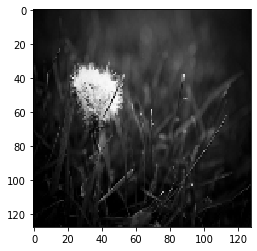

Actual:dandelion
Prediction:tulip


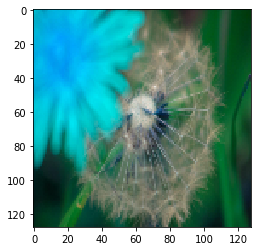

Actual:dandelion
Prediction:dandelion


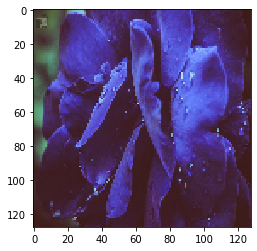

Actual:rose
Prediction:rose


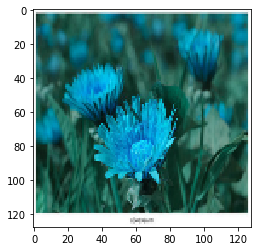

Actual:dandelion
Prediction:dandelion


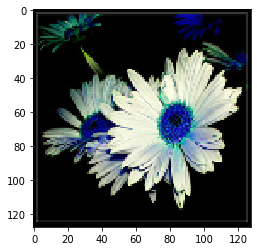

Actual:daisy
Prediction:rose


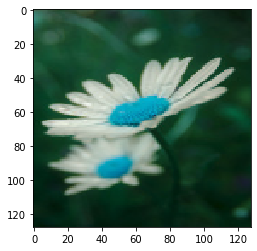

Actual:daisy
Prediction:daisy


In [33]:
for i in range(20):
    plt.imshow(test_data[i], cmap = plt.cm.binary)
    plt.show()

    print("Actual:" + class_name[test_labels[i]])
    print("Prediction:" + class_name[np.argmax(prediction[i])])